# Sprint 9 - Tasca M9 T01

- **Exercici 1:**
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.


- **Exercici 2:**
Treu les stopwords i realitza stemming al teu conjunt de dades.


- **Exercici 3:**
Realitza sentiment analysis al teu conjunt de dades.

Instalamos la librería NLTK con la que realizaremos la tarea, siguiendo las indicaciones disponibles [aquí](https://www.nltk.org/data.html).

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.probability import FreqDist

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from nltk.sentiment.vader import SentimentIntensityAnalyzer


## Exercici 1: 

Le pedimos a chat GPT que escriba una carta para mi hermana, sobre su respuesta aplicamos los siguientes procesos:

* **Tokenizamos:**  Es el proceso mendiante el cual vamos a sub-dividir la cadena de texto en unidades lingüísticas mínimas, es decir divir en palabras.
* **Frecuencia:** Haremos un recuento de las veces que aparece cada palabra en nuestro texto. 

Dear María,

I hope this letter finds you in good health and high spirits. I just wanted to take a moment to express how grateful I am to have a sister like you. You have always been there for me, supporting me through thick and thin. I will never forget the memories we have shared together, from the silly moments to the ones that brought us to tears.

I know life can get busy and we don't always have the chance to talk as much as we would like, but I want you to know that I am always here for you. No matter the distance, you will always be in my thoughts and in my heart.

I am excited to hear about all the amazing things you are doing and I can't wait to see you soon. Until then, I hope this letter brings a smile to your face and reminds you how much you are loved.

With love and admiration,

Ana

In [2]:
texto = """Dear María,

I hope this letter finds you in good health and high spirits. I just wanted to take a moment to express how grateful I am to have a sister like you. You have always been there for me, supporting me through thick and thin. I will never forget the memories we have shared together, from the silly moments to the ones that brought us to tears.

I know life can get busy and we don't always have the chance to talk as much as we would like, but I want you to know that I am always here for you. No matter the distance, you will always be in my thoughts and in my heart.

I am excited to hear about all the amazing things you are doing and I can't wait to see you soon. Until then, I hope this letter brings a smile to your face and reminds you how much you are loved.

With love and admiration,

Ana"""

In [3]:
tokenized_texto = sent_tokenize(texto)
print(tokenized_texto)

['Dear María,\n\nI hope this letter finds you in good health and high spirits.', 'I just wanted to take a moment to express how grateful I am to have a sister like you.', 'You have always been there for me, supporting me through thick and thin.', 'I will never forget the memories we have shared together, from the silly moments to the ones that brought us to tears.', "I know life can get busy and we don't always have the chance to talk as much as we would like, but I want you to know that I am always here for you.", 'No matter the distance, you will always be in my thoughts and in my heart.', "I am excited to hear about all the amazing things you are doing and I can't wait to see you soon.", 'Until then, I hope this letter brings a smile to your face and reminds you how much you are loved.', 'With love and admiration,\n\nAna']


In [4]:
tokenized_word = word_tokenize(texto)
print(tokenized_word)

['Dear', 'María', ',', 'I', 'hope', 'this', 'letter', 'finds', 'you', 'in', 'good', 'health', 'and', 'high', 'spirits', '.', 'I', 'just', 'wanted', 'to', 'take', 'a', 'moment', 'to', 'express', 'how', 'grateful', 'I', 'am', 'to', 'have', 'a', 'sister', 'like', 'you', '.', 'You', 'have', 'always', 'been', 'there', 'for', 'me', ',', 'supporting', 'me', 'through', 'thick', 'and', 'thin', '.', 'I', 'will', 'never', 'forget', 'the', 'memories', 'we', 'have', 'shared', 'together', ',', 'from', 'the', 'silly', 'moments', 'to', 'the', 'ones', 'that', 'brought', 'us', 'to', 'tears', '.', 'I', 'know', 'life', 'can', 'get', 'busy', 'and', 'we', 'do', "n't", 'always', 'have', 'the', 'chance', 'to', 'talk', 'as', 'much', 'as', 'we', 'would', 'like', ',', 'but', 'I', 'want', 'you', 'to', 'know', 'that', 'I', 'am', 'always', 'here', 'for', 'you', '.', 'No', 'matter', 'the', 'distance', ',', 'you', 'will', 'always', 'be', 'in', 'my', 'thoughts', 'and', 'in', 'my', 'heart', '.', 'I', 'am', 'excited', '

In [5]:
freqdist = FreqDist(tokenized_word)
print(freqdist)

<FreqDist with 101 samples and 180 outcomes>


In [6]:
freqdist.most_common(15)

[('I', 10),
 ('to', 10),
 ('you', 9),
 ('.', 8),
 (',', 7),
 ('and', 7),
 ('the', 6),
 ('have', 4),
 ('always', 4),
 ('in', 3),
 ('a', 3),
 ('am', 3),
 ('we', 3),
 ('hope', 2),
 ('this', 2)]

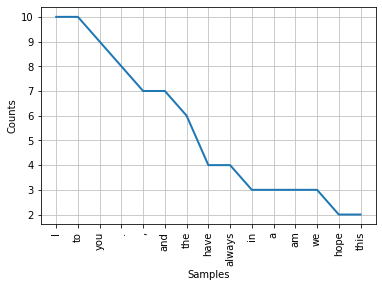

In [7]:
freqdist.plot(15, cumulative=False)
plt.show()

## Exercici 2:

Treu les stopwords i realitza stemming al teu conjunt de dades. Los procesos que vamos a aplicar en este paso son los siguientes.


* **Stopwords:** Son aquellas palabras carentes de significancia, que únicamente van a generar ruido en nuestro texto.

* **Stemming:** La lematización, en castellano, va a ser el proceso mediante el cual vamos llevar a las palabras a su raiz. 

In [8]:
sw = set(stopwords.words("english"))
print("Stopwords de la librería: " ,sw)

Stopwords de la librería:  {'yours', 'll', 'am', 'hasn', 'did', 'our', 'their', 'themselves', 'for', 'theirs', 'under', 'or', 'just', 'of', 'won', "haven't", 'more', 'same', 'few', 'whom', 'ours', 'are', 'before', 'it', 'itself', 'the', 'who', "you've", 'his', 'why', 've', 'weren', 'until', 'aren', 'is', 'be', 'once', 'hers', 'had', 'isn', 'which', 'a', 'he', 'then', 'own', 'each', 'those', 'them', 'most', "you'll", 'y', 'him', 'they', "didn't", 'don', "hadn't", 'while', 'how', "wasn't", "weren't", 'out', 'these', 'she', 'shouldn', "you'd", 'its', 'by', 'can', 'couldn', "mightn't", 'do', 'if', 'doesn', 'my', "needn't", 'were', "won't", 'after', 'about', 'wasn', 'yourself', 'we', 'in', 'what', "that'll", 'myself', 'and', 'above', "couldn't", "it's", 'ma', 'both', 'haven', 'off', 'now', "mustn't", 'below', 'from', 'only', 'all', "shouldn't", 'so', 'being', 'wouldn', 'down', 'yourselves', 'other', 'shan', "shan't", 'o', 'very', 'to', 'didn', "don't", 'needn', 'when', 'because', 'an', 'the

In [9]:
sw_texto=[]
for i in tokenized_word:
    if i not in sw:
        sw_texto.append(i)
print("Texto sin stopwords" ,sw_texto)

Texto sin stopwords ['Dear', 'María', ',', 'I', 'hope', 'letter', 'finds', 'good', 'health', 'high', 'spirits', '.', 'I', 'wanted', 'take', 'moment', 'express', 'grateful', 'I', 'sister', 'like', '.', 'You', 'always', ',', 'supporting', 'thick', 'thin', '.', 'I', 'never', 'forget', 'memories', 'shared', 'together', ',', 'silly', 'moments', 'ones', 'brought', 'us', 'tears', '.', 'I', 'know', 'life', 'get', 'busy', "n't", 'always', 'chance', 'talk', 'much', 'would', 'like', ',', 'I', 'want', 'know', 'I', 'always', '.', 'No', 'matter', 'distance', ',', 'always', 'thoughts', 'heart', '.', 'I', 'excited', 'hear', 'amazing', 'things', 'I', 'ca', "n't", 'wait', 'see', 'soon', '.', 'Until', ',', 'I', 'hope', 'letter', 'brings', 'smile', 'face', 'reminds', 'much', 'loved', '.', 'With', 'love', 'admiration', ',', 'Ana']


In [10]:
ps = PorterStemmer()

stemmed_words = []
for i in sw_texto:
    stemmed_words.append(ps.stem(i))

print("Texto lematizado: " ,stemmed_words)

Texto lematizado:  ['dear', 'maría', ',', 'i', 'hope', 'letter', 'find', 'good', 'health', 'high', 'spirit', '.', 'i', 'want', 'take', 'moment', 'express', 'grate', 'i', 'sister', 'like', '.', 'you', 'alway', ',', 'support', 'thick', 'thin', '.', 'i', 'never', 'forget', 'memori', 'share', 'togeth', ',', 'silli', 'moment', 'one', 'brought', 'us', 'tear', '.', 'i', 'know', 'life', 'get', 'busi', "n't", 'alway', 'chanc', 'talk', 'much', 'would', 'like', ',', 'i', 'want', 'know', 'i', 'alway', '.', 'no', 'matter', 'distanc', ',', 'alway', 'thought', 'heart', '.', 'i', 'excit', 'hear', 'amaz', 'thing', 'i', 'ca', "n't", 'wait', 'see', 'soon', '.', 'until', ',', 'i', 'hope', 'letter', 'bring', 'smile', 'face', 'remind', 'much', 'love', '.', 'with', 'love', 'admir', ',', 'ana']


Observamos que mediante el proceso de lematización, los verbos los pone en infinitivo y de otras palabras se queda sólo con la raiz. 

## Exercici 3:

Realitza sentiment analysis al teu conjunt de dades.

[Link](https://towardsdatascience.com/sentimental-analysis-using-vader-a3415fef7664)

In [11]:
analisis = SentimentIntensityAnalyzer()
analisis.polarity_scores(texto)

{'neg': 0.023, 'neu': 0.692, 'pos': 0.285, 'compound': 0.992}

En nuestro texto predomina el componente neutro con más de un 60%, seguido de un sentimiento positivo que supera el 20%, siendo el componente negativo el menos representativo. Destacable también que el "compuesto" suba al 99%. 

Procedemos a pedir a chat GPT que redacte una carta para mostrar el enfado a la misma persona por una situación concreta para observar si el número de sentimiento negativo aumenta. 

In [12]:
texto_dos ="""Dear María,

I hope this letter finds you well. I am writing to express my feelings about a recent situation that has left me feeling angry and frustrated. I believe it is important that we talk about this and work towards a resolution.

I am upset because the accident. This behavior is unacceptable and hurtful, and it goes against the trust and respect that we should have for each other as siblings.

I understand that we all make mistakes, and I am not perfect either. However, I need to make it clear that this behavior is not acceptable and I expect better from you. I value our relationship as siblings and I want us to be able to resolve this issue and move forward.

Please take some time to reflect on your actions and consider the impact they have on others. I am open to having a conversation with you about this and finding a solution that works for both of us.

I love you and I hope that we can work through this together.

Sincerely,
Ana."""

In [13]:
analisis.polarity_scores(texto_dos)

{'neg': 0.129, 'neu': 0.656, 'pos': 0.215, 'compound': 0.9279}

Efectivamente comprobamos que varia el porcentaje asignado a cada tipo de sentimiento.

Por último análizamos un extracto del discurso "I have a dream" de Martin Luther King de 1963, con el fin de ver la "polaridad" del mismo, si se trata de una arenga positiva por ejemplo, o si al ser un texto escrito a mano cambia en el número de compuestos. 

In [14]:
texto_discurso = """I am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation.

Five score years ago, a great American, in whose symbolic shadow we stand today, signed the Emancipation Proclamation. This momentous decree came as a great beacon light of hope to millions of Negro slaves who had been seared in the flames of withering injustice. It came as a joyous daybreak to end the long night of their captivity.

But one hundred years later, the Negro still is not free. One hundred years later, the life of the Negro is still sadly crippled by the manacles of segregation and the chains of discrimination. One hundred years later, the Negro lives on a lonely island of poverty in the midst of a vast ocean of material prosperity. One hundred years later, the Negro is still languished in the corners of American society and finds himself an exile in his own land. And so we've come here today to dramatize a shameful condition.

In a sense we've come to our nation's capital to cash a check. When the architects of our republic wrote the magnificent words of the Constitution and the Declaration of Independence, they were signing a promissory note to which every American was to fall heir. This note was a promise that all men, yes, black men as well as white men, would be guaranteed the "unalienable Rights" of "Life, Liberty and the pursuit of Happiness." It is obvious today that America has defaulted on this promissory note, insofar as her citizens of color are concerned. Instead of honoring this sacred obligation, America has given the Negro people a bad check, a check which has come back marked "insufficient funds."

But we refuse to believe that the bank of justice is bankrupt. We refuse to believe that there are insufficient funds in the great vaults of opportunity of this nation. And so, we've come to cash this check, a check that will give us upon demand the riches of freedom and the security of justice.

We have also come to this hallowed spot to remind America of the fierce urgency of Now. This is no time to engage in the luxury of cooling off or to take the tranquilizing drug of gradualism. Now is the time to make real the promises of democracy. Now is the time to rise from the dark and desolate valley of segregation to the sunlit path of racial justice. Now is the time to lift our nation from the quicksands of racial injustice to the solid rock of brotherhood. Now is the time to make justice a reality for all of God's children.

It would be fatal for the nation to overlook the urgency of the moment. This sweltering summer of the Negro's legitimate discontent will not pass until there is an invigorating autumn of freedom and equality. Nineteen sixty-three is not an end, but a beginning. And those who hope that the Negro needed to blow off steam and will now be content will have a rude awakening if the nation returns to business as usual. And there will be neither rest nor tranquility in America until the Negro is granted his citizenship rights. The whirlwinds of revolt will continue to shake the foundations of our nation until the bright day of justice emerges.

But there is something that I must say to my people, who stand on the warm threshold which leads into the palace of justice: In the process of gaining our rightful place, we must not be guilty of wrongful deeds. Let us not seek to satisfy our thirst for freedom by drinking from the cup of bitterness and hatred. We must forever conduct our struggle on the high plane of dignity and discipline. We must not allow our creative protest to degenerate into physical violence. Again and again, we must rise to the majestic heights of meeting physical force with soul force.

The marvelous new militancy which has engulfed the Negro community must not lead us to a distrust of all white people, for many of our white brothers, as evidenced by their presence here today, have come to realize that their destiny is tied up with our destiny. And they have come to realize that their freedom is inextricably bound to our freedom.

We cannot walk alone.

And as we walk, we must make the pledge that we shall always march ahead.

We cannot turn back."""

In [15]:
analisis.polarity_scores(texto_discurso)

{'neg': 0.099, 'neu': 0.719, 'pos': 0.182, 'compound': 0.9976}

Aunque es una aproximación parcial, totalmente subjetiva y para nada en profundidad, si podemos observar a priori el componente positivo de este análisis.